In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#import Dataset
df_raw = pd.read_csv("train.csv")

In [3]:
#First five row of Dataset
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
type(df_raw)

pandas.core.frame.DataFrame

In [5]:
#shape of Data set
df_raw.shape

(891, 12)

In [6]:
#datatype of all columns
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#discriptive stats
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
#all columns of datasets
df_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

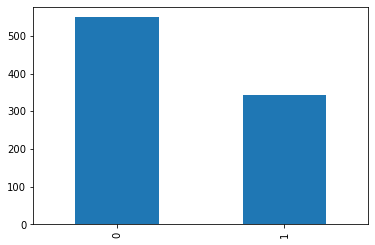

In [9]:
#barplot of target varible
df_raw['Survived'].value_counts().plot.bar()

<AxesSubplot:>

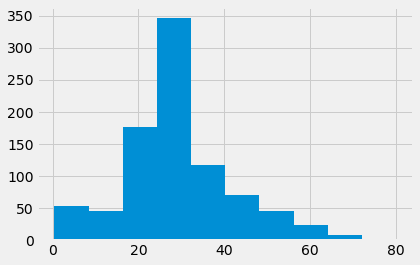

In [57]:
#histogram of age
df_raw['Age'].hist()

In [11]:
#checking null values
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#checking skewness
df_raw.skew()

C:\Users\Acer\AppData\Local\Temp/ipykernel_19804/708919261.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [13]:
# If skewness is less than 
# -1 or greater than 1, the distribution is highly skewed.

for i,j in df_raw.skew().items():
    if (j < -1) or (j > 1):
        print("Highly Skewed",i)

Highly Skewed SibSp
Highly Skewed Parch
Highly Skewed Fare


C:\Users\Acer\AppData\Local\Temp/ipykernel_19804/3715784168.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for i,j in df_raw.skew().items():


<AxesSubplot:>

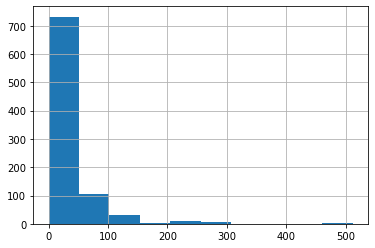

In [14]:
df_raw['Fare'].hist()

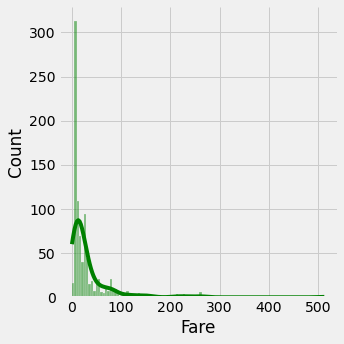

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

sns.displot(df_raw['Fare'],kde=True,color='green',height=5)

In [16]:
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

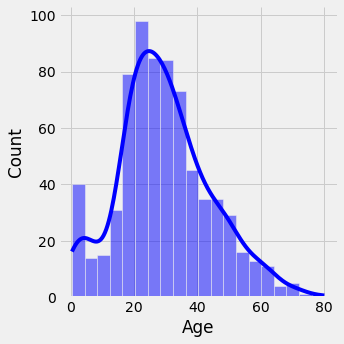

In [17]:
sns.displot(df_raw['Age'],kde=True,color='blue',height=5)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

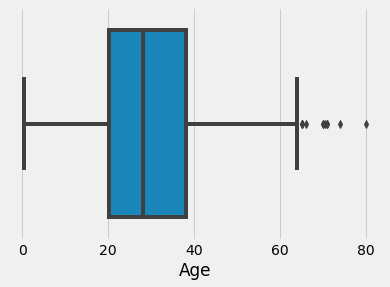

In [18]:
sns.boxplot(df_raw['Age'])

In [19]:
df_raw['Age'] = df_raw['Age'].fillna(df_raw['Age'].median())

<AxesSubplot:xlabel='Survived', ylabel='count'>

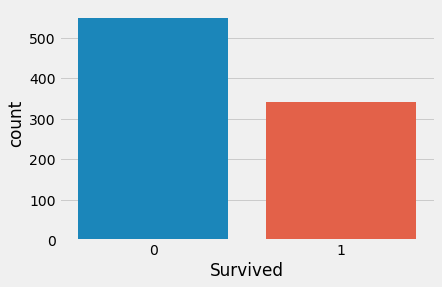

In [20]:
sns.countplot(x=df_raw['Survived'],color=None)

<AxesSubplot:>

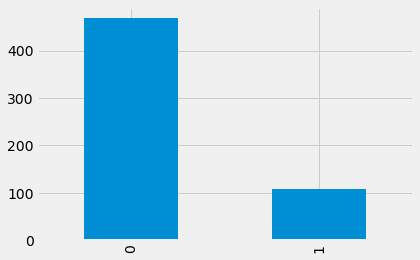

In [21]:
df_raw[df_raw['Sex']=="male"]['Survived'].value_counts().plot.bar()

<AxesSubplot:>

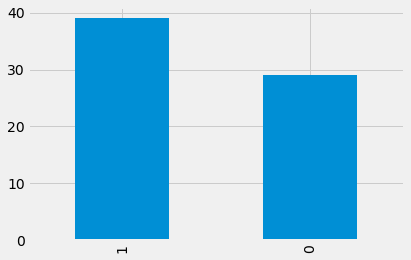

In [22]:
df_raw[df_raw['Age']<12]['Survived'].value_counts().plot.bar()

In [23]:
df_raw.groupby('Survived')['Sex'].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

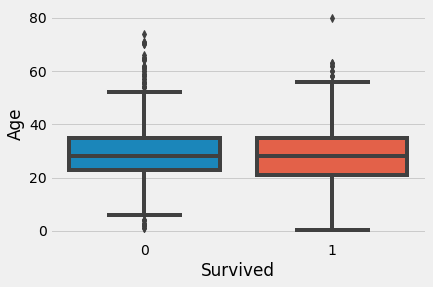

In [24]:
sns.boxplot(x='Survived',
    y='Age',
    data=df_raw,)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

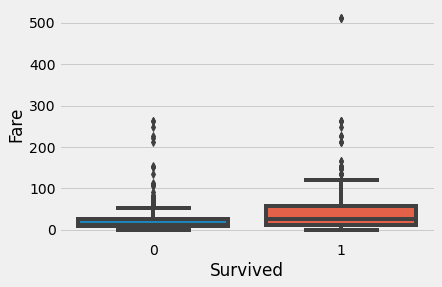

In [25]:
sns.boxplot(x='Survived',
    y='Fare',
    data=df_raw,)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

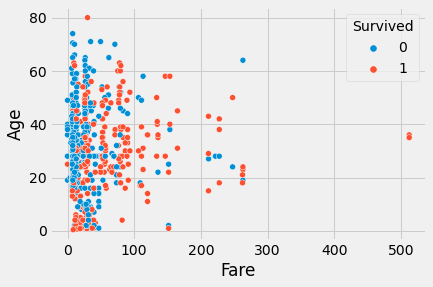

In [26]:
sns.scatterplot(x='Fare',
    y="Age",
    hue="Survived",
    data=df_raw,)

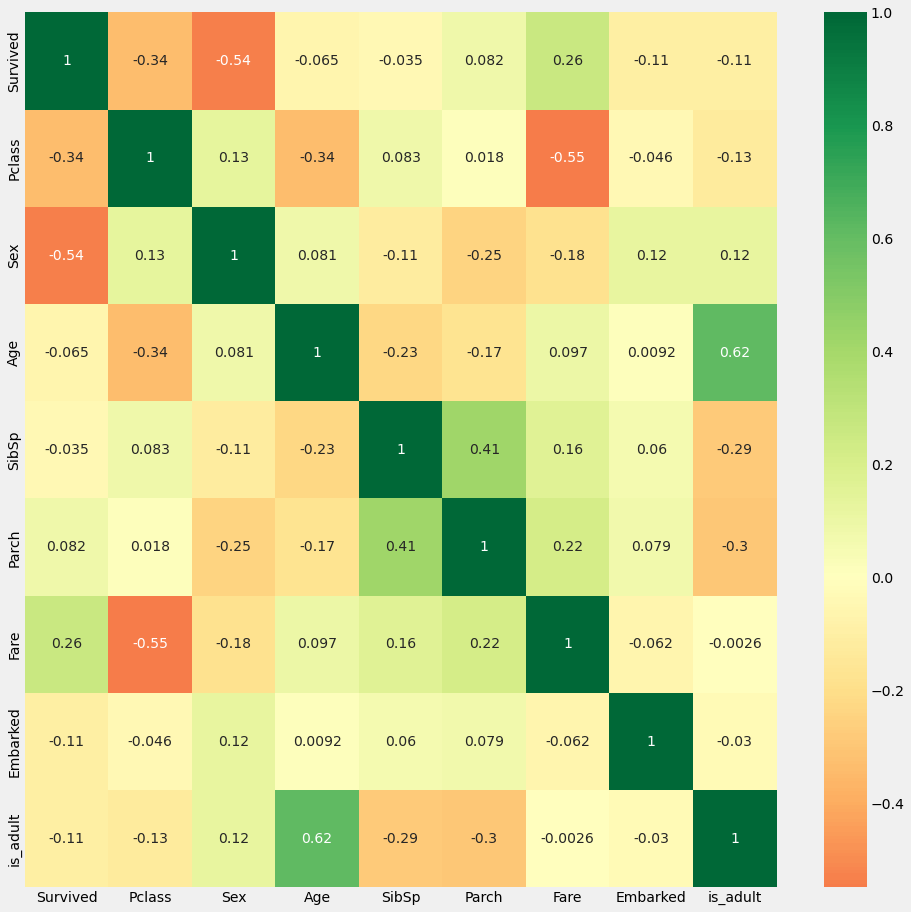

In [60]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df_raw.corr(), annot=True,cmap='RdYlGn',center=0) 

In [27]:
df_raw['is_adult'] = np.where(df_raw['Age']>18,1,0)
df_raw['is_adult'].value_counts()

1    752
0    139
Name: is_adult, dtype: int64

In [28]:
df_raw['Cabin'].isnull().sum()/df_raw.shape[0] * 100

77.10437710437711

In [29]:
df_raw.drop(['Cabin'],axis=1,inplace=True)

In [30]:
df_raw.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [31]:
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_adult
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,1


In [32]:
#Fillingnull values by mode
df_raw['Embarked'] = df_raw['Embarked'].fillna(df_raw['Embarked'].mode()[0]) 

In [33]:
#coding labels
df_raw["Sex"] = df_raw["Sex"].map({"male" : 1,
                                  "female" : 0}) 

In [34]:
#checking value count of embark
df_raw['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_adult
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,1
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,1
4,0,3,1,35.0,0,0,8.0500,S,1


In [36]:
#df_raw.to_csv("titanic_clean.csv",index=False)

In [37]:
df_raw['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
df_raw["Embarked"] = df_raw["Embarked"].map({"S" : 2,
                                  "C" : 1, "Q" :0 }) 

In [39]:
df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_adult
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,1


In [45]:
x=df_raw.drop(['Survived'],axis=1)
y=df_raw[['Survived']]

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [47]:
print("Shape of y in train set ",y_train.shape)
print("Shape of X in train set ",x_train.shape)
print("Shape of y in test set ",y_test.shape)
print("Shape of X in test set ",x_test.shape)

Shape of y in train set  (596, 1)
Shape of X in train set  (596, 8)
Shape of y in test set  (295, 1)
Shape of X in test set  (295, 8)


In [48]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [44]:
#importing libraries
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

# Training the model:
lr.fit(x_train, y_train)


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred0 = lr.predict(x_test)

lr_probs = lr.predict_proba(x_test)

y_pred0

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [59]:
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.8135593220338984


In [52]:
actual = y_test
predicted = y_pred0 
results = confusion_matrix(actual, predicted) 


print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[153  22]
 [ 33  87]]


In [53]:
#Classification report
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

